In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests


from google.colab import drive
drive.mount("/content/drive/")

#Scrapping

data = pd.read_excel("/content/drive/My Drive/oguz_cs210_spotify.xlsx")

# Assuming songs_data is the list you created with song data
songs_df = pd.DataFrame(data)

# Split genres in each row (as some songs have multiple genres)
all_genres = songs_df['Parent Genres'].str.split(',').explode().str.strip()

# Get the top 10 most frequent genres
top_genres = all_genres.value_counts().head(10)

# Print the top 10 genres with their counts
print("Top 10 Parent Genres:")
print(top_genres)

Mounted at /content/drive/
Top 10 Parent Genres:
Pop                  126
Hip Hop               92
Electronic            24
Rock                  24
R&B                   23
Latin                  3
Folk/Acoustic          3
World/Traditional      3
Country                1
Easy listening         1
Name: Parent Genres, dtype: int64


In [2]:
# Assuming songs_data is the list you created with song data
songs_df = pd.DataFrame(data)

# Split genres in each row (as some songs have multiple genres)
all_genres = songs_df['Parent Genres'].str.split(',').explode().str.strip()

# Get the top 10 most frequent genres
top_genres = all_genres.value_counts()

# Filter genres that appear more than 10 times
popular_genres = top_genres[top_genres > 10].index

# Filter the DataFrame to include only rows with popular genres
filtered_df = songs_df[songs_df['Parent Genres'].astype(str).apply(lambda x: any(g in popular_genres for g in x.split(',')))]

# Convert the 'popularity' column to numeric (assuming it's stored as strings)
filtered_df['Popularity'] = pd.to_numeric(filtered_df['Popularity'])

# Calculate the average popularity score for each genre
avg_popularity_by_genre = filtered_df.groupby('Parent Genres')['Popularity'].mean()

# Get the top 5 most popular genres based on average popularity score
top_popular_genres = avg_popularity_by_genre.sort_values(ascending=False).head(5)

# Print the top 5 genres with their average popularity score
print("Top 5 Most Popular Genres (appearing more than 10 times):")
print(top_popular_genres)

Top 5 Most Popular Genres (appearing more than 10 times):
Parent Genres
Hip Hop, R&B, Pop                  84.0
Pop, World/Traditional, Hip Hop    83.5
Rock, Hip Hop, Pop                 81.0
R&B, Electronic                    81.0
R&B, Hip Hop, Pop, Electronic      80.0
Name: Popularity, dtype: float64


<ipython-input-2-1653d4fa6293>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Popularity'] = pd.to_numeric(filtered_df['Popularity'])


<ipython-input-3-f7acb7daed7b>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Parent Genres', y='Popularity', data=genres_and_popularity_top, ci=None)


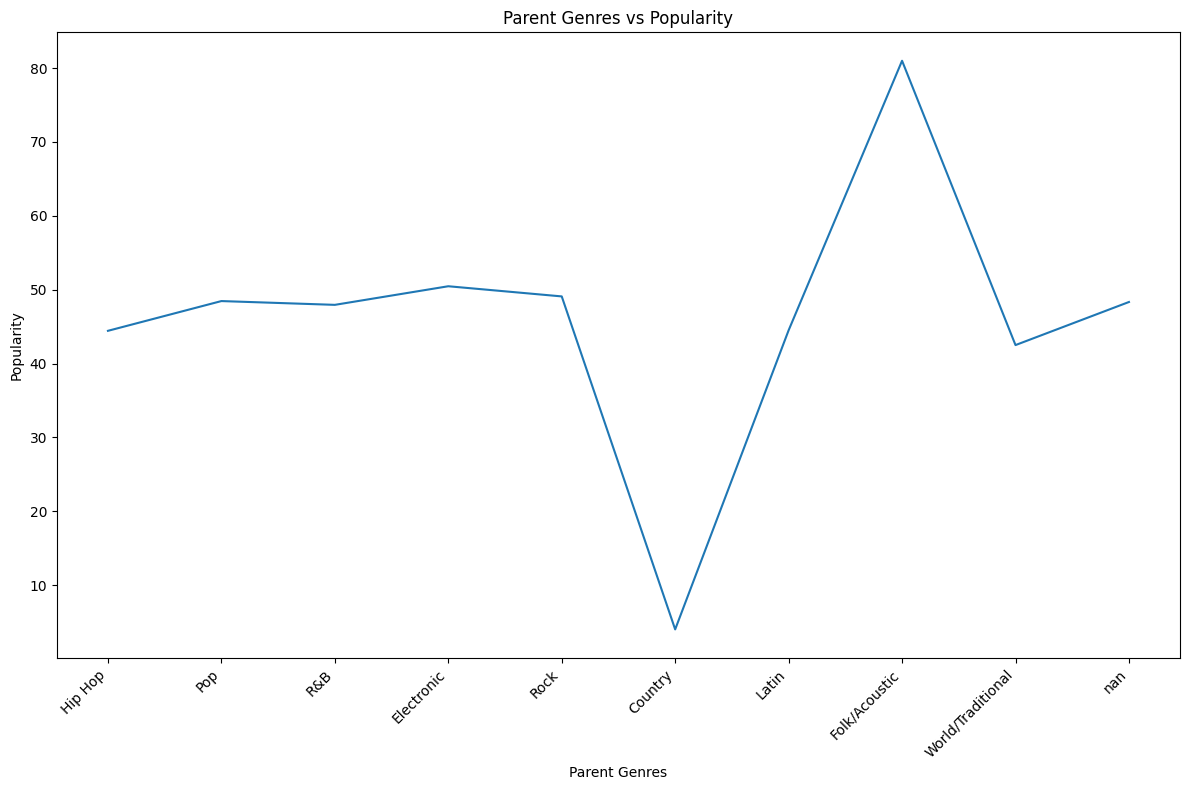

In [3]:
#Assuming 'Genres' column contains a comma-separated list of genres for each song
# If it's not already a string, convert it to string
data['Parent Genres'] = data['Parent Genres'].astype(str)

# Split the genres and create a list of all unique genres
all_genres = [genre.strip() for genres in data['Parent Genres'] for genre in genres.split(',')]

# Create a Pandas Series to easily count the occurrences of each genre
genres_series = pd.Series(all_genres)

# Filter the DataFrame to include only the top genres
genres_and_popularity = pd.DataFrame({'Parent Genres': genres_series, 'Popularity': data['Popularity']})

# Count the occurrences of each genre per year
top_genres_by_popularity_plot = genres_series.value_counts().index

genres_and_popularity_top = genres_and_popularity[genres_and_popularity['Parent Genres'].isin(top_genres_by_popularity_plot)]

# Plot genre counts vs happy using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Parent Genres', y='Popularity', data=genres_and_popularity_top, ci=None)
plt.title('Parent Genres vs Popularity')
plt.xlabel('Parent Genres')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-4-ae4d995b0f2d>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Parent Genres', y='Year', data=genres_and_year_top, ci=None)


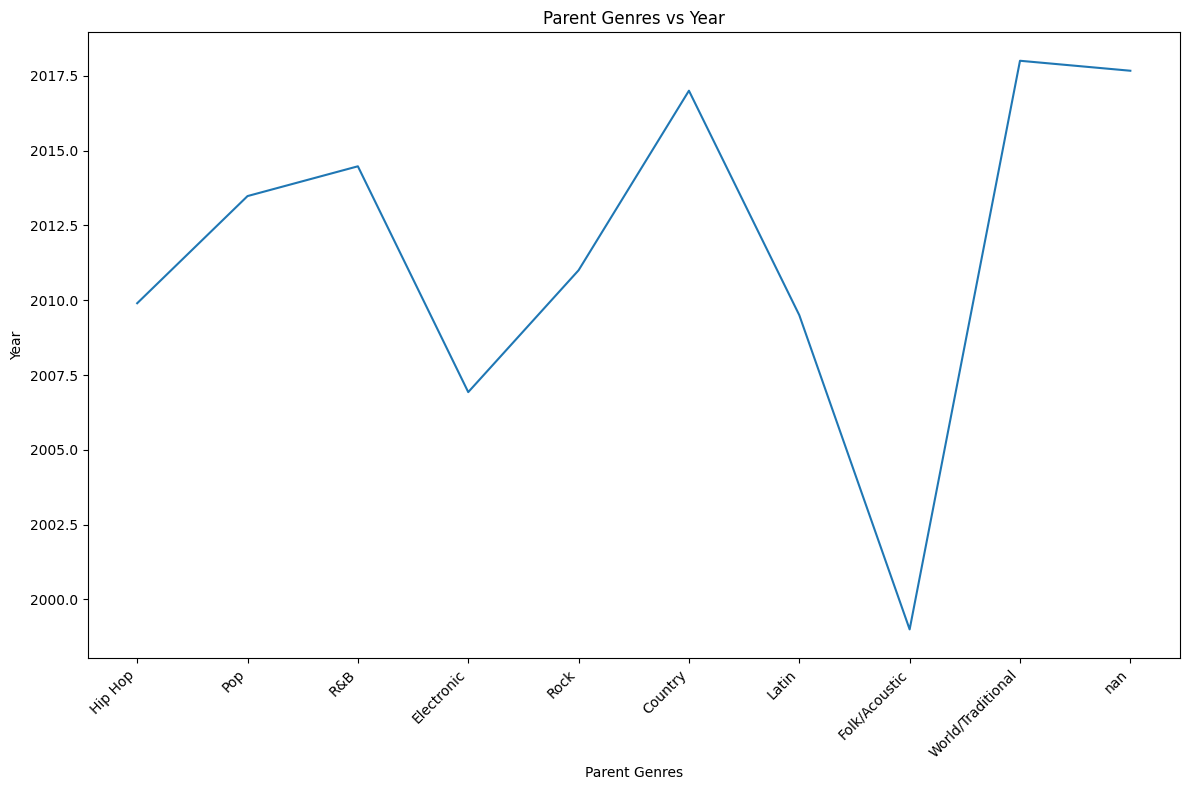

In [4]:
# If it's not already a string, convert it to string
data['Parent Genres'] = data['Parent Genres'].astype(str)

# Split the genres and create a list of all unique genres
all_genres = [genre.strip() for genres in data['Parent Genres'] for genre in genres.split(',')]

# Convert the 'Album Date' column to datetime
data['Album Date'] = pd.to_datetime(data['Album Date'], errors='coerce')

# Extract the year from the 'Album Date' column
data['Year'] = data['Album Date'].dt.year

# Create a Pandas Series to easily count the occurrences of each genre
genres_series = pd.Series(all_genres)

# Filter the DataFrame to include only the top genres
genres_and_year = pd.DataFrame({'Parent Genres': genres_series, 'Year': data['Year']})

# Count the occurrences of each genre per year
top_genres_by_year_plot = genres_series.value_counts().index

genres_and_year_top = genres_and_year[genres_and_year['Parent Genres'].isin(top_genres_by_year_plot)]

# Plot genre counts vs happy using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Parent Genres', y='Year', data=genres_and_year_top, ci=None)
plt.title('Parent Genres vs Year')
plt.xlabel('Parent Genres')
plt.ylabel('Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-6-e85dacd8e85c>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Parent Genres', y='Happy', data=genres_and_happiness_top, ci=None)


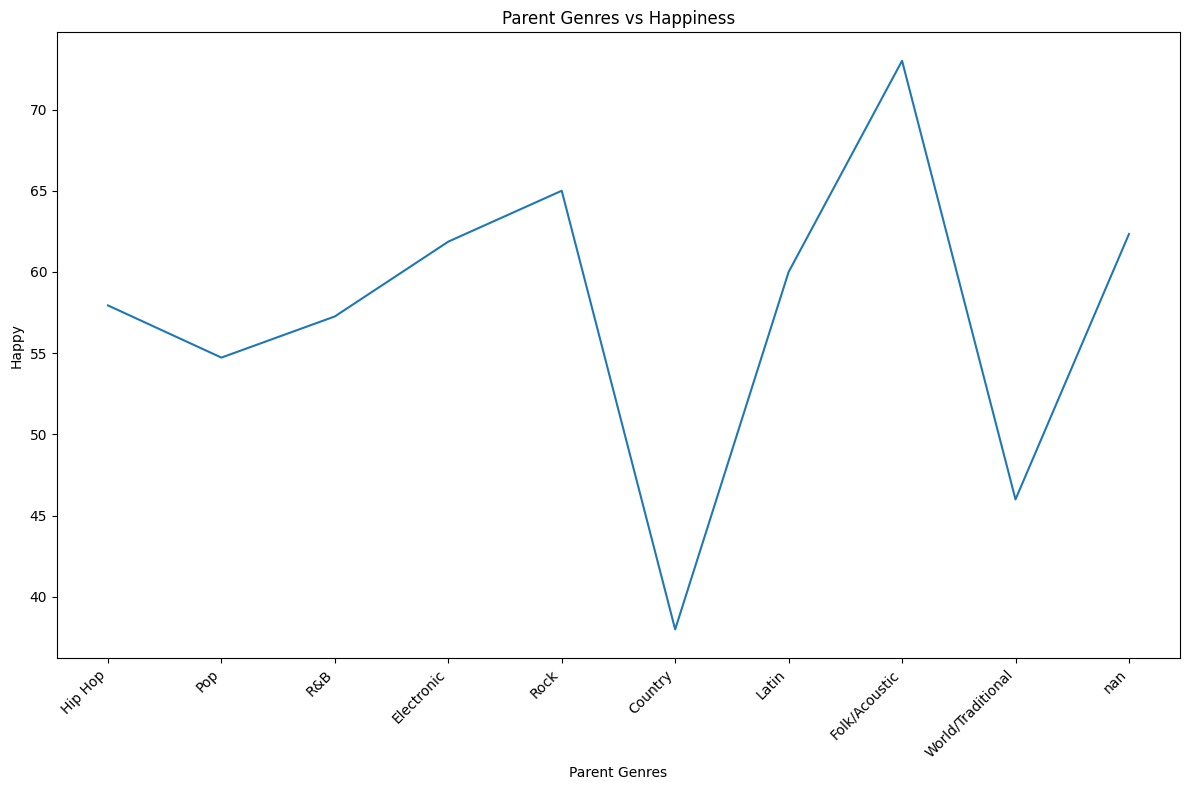

In [6]:
# Split the genres and create a list of all unique genres
all_genres = [genre.strip() for genres in data['Parent Genres'] for genre in genres.split(',')]

# Create a Pandas Series to easily count the occurrences of each genre
genres_series = pd.Series(all_genres)

# Create a DataFrame with genres and corresponding happiness scores
genres_and_happiness = pd.DataFrame({'Parent Genres': genres_series, 'Happy': data['Happy']})

# Choose the top N genres to plot
top_genres_to_plot = genres_series.value_counts().index

# Filter the DataFrame to include only the top genres
genres_and_happiness_top = genres_and_happiness[genres_and_happiness['Parent Genres'].isin(top_genres_to_plot)]

# Plot genres vs happiness using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Parent Genres', y='Happy', data=genres_and_happiness_top, ci=None)
plt.title('Parent Genres vs Happiness')
plt.xlabel('Parent Genres')
plt.ylabel('Happy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-7-07c74a9a81ed>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Parent Genres', y='Dance', data=genres_and_dance_top, ci=None)


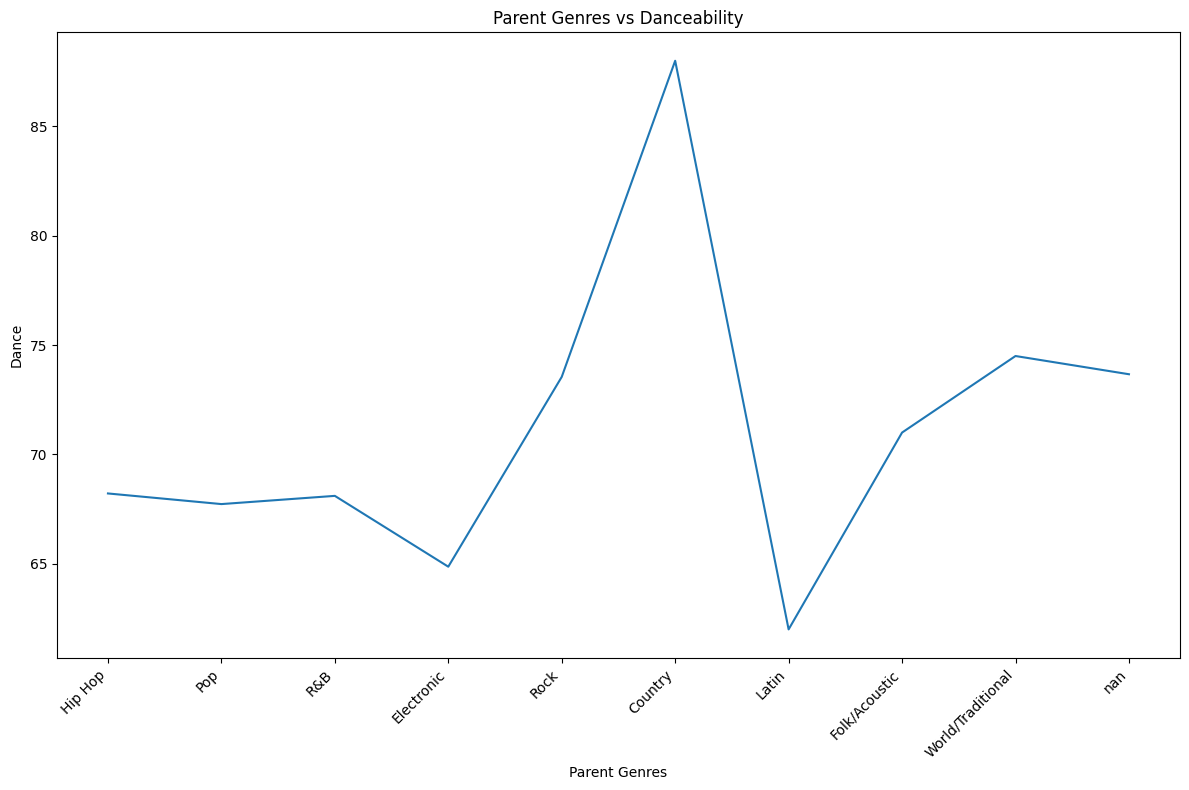

In [7]:
# Split the genres and create a list of all unique genres
all_genres = [genre.strip() for genres in data['Parent Genres'] for genre in genres.split(',')]

# Create a Pandas Series to easily count the occurrences of each genre
genres_series = pd.Series(all_genres)

# Filter the DataFrame to include only the top genres
genres_and_dance = pd.DataFrame({'Parent Genres': genres_series, 'Dance': data['Dance']})

# Count the occurrences of each genre per year
top_genres_by_dance_plot = genres_series.value_counts().index

genres_and_dance_top = genres_and_dance[genres_and_dance['Parent Genres'].isin(top_genres_by_dance_plot)]

# Plot genre counts vs happy using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Parent Genres', y='Dance', data=genres_and_dance_top, ci=None)
plt.title('Parent Genres vs Danceability')
plt.xlabel('Parent Genres')
plt.ylabel('Dance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-8-97c1577ef774>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Parent Genres', y='Acoustic', data=genres_and_acoustic_top, ci=None)


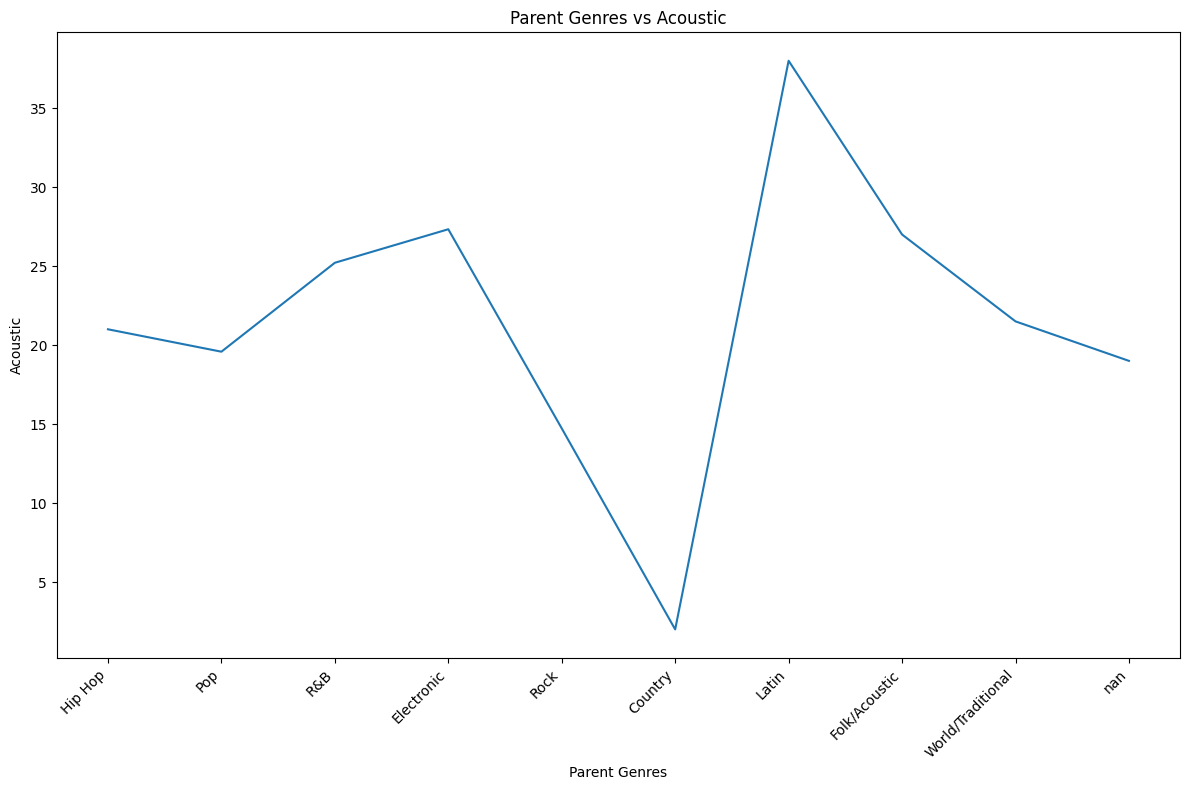

In [8]:
# Split the genres and create a list of all unique genres
all_genres = [genre.strip() for genres in data['Parent Genres'] for genre in genres.split(',')]

# Create a Pandas Series to easily count the occurrences of each genre
genres_series = pd.Series(all_genres)

# Filter the DataFrame to include only the top genres
genres_and_acoustic = pd.DataFrame({'Parent Genres': genres_series, 'Acoustic': data['Acoustic']})

# Count the occurrences of each genre per year
top_genres_by_acoustic_plot = genres_series.value_counts().index

genres_and_acoustic_top = genres_and_acoustic[genres_and_acoustic['Parent Genres'].isin(top_genres_by_acoustic_plot)]

# Plot genre counts vs happy using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Parent Genres', y='Acoustic', data=genres_and_acoustic_top, ci=None)
plt.title('Parent Genres vs Acoustic')
plt.xlabel('Parent Genres')
plt.ylabel('Acoustic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-11-d15c8504a9c4>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Parent Genres', y='Energy', data=genres_and_energy_top, ci=None)


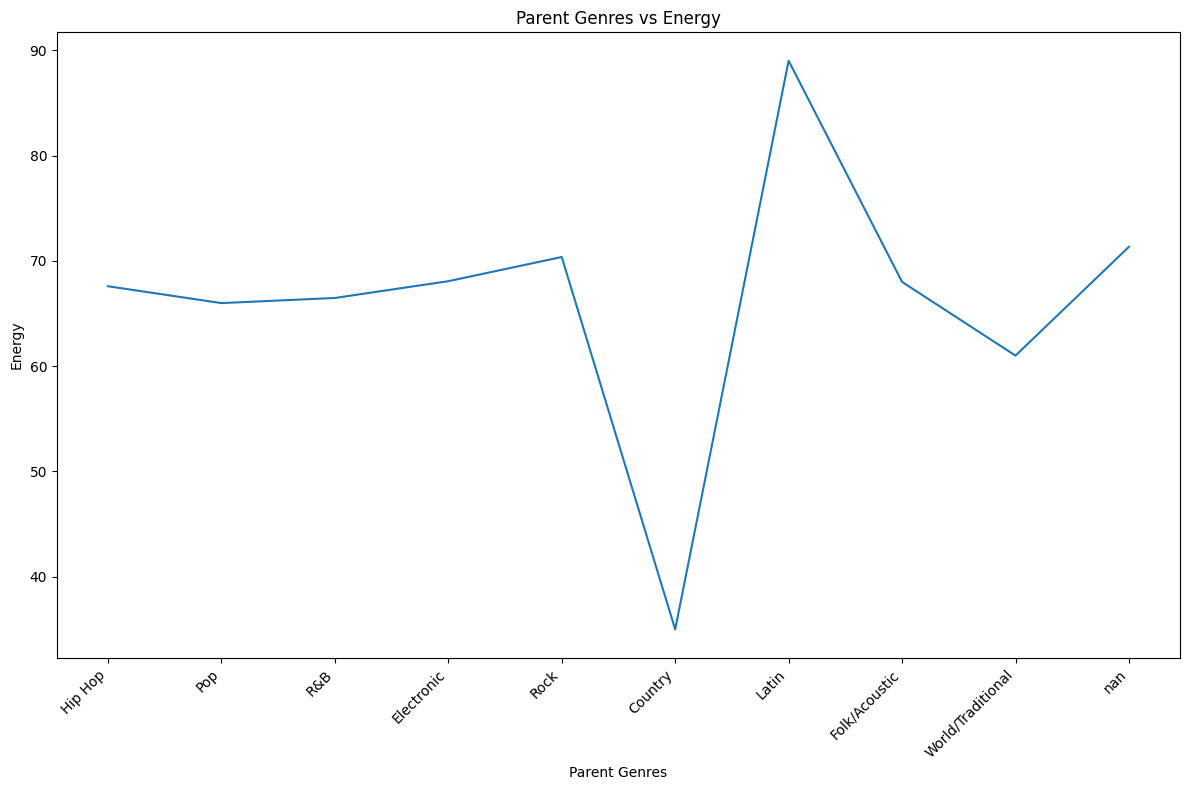

In [11]:
# Split the genres and create a list of all unique genres
all_genres = [genre.strip() for genres in data['Parent Genres'] for genre in genres.split(',')]

# Create a Pandas Series to easily count the occurrences of each genre
genres_series = pd.Series(all_genres)

# Filter the DataFrame to include only the top genres
genres_and_energy = pd.DataFrame({'Parent Genres': genres_series, 'Energy': data['Energy']})

# Count the occurrences of each genre per year
top_genres_by_energy_plot = genres_series.value_counts().index

genres_and_energy_top = genres_and_energy[genres_and_energy['Parent Genres'].isin(top_genres_by_energy_plot)]

# Plot genre counts vs happy using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Parent Genres', y='Energy', data=genres_and_energy_top, ci=None)
plt.title('Parent Genres vs Energy')
plt.xlabel('Parent Genres')
plt.ylabel('Energy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()